# Healthcare Insurance Analysis & Prediction

## Table of Contents


* [Introduction](#Introduction)
* [Data Loading](#Data-Loading)
* [Data Transformation](#Data-Transformation)
* [EDA (Exploratory Data Analysis)](#EDA-(Exploratory-Data-Analysis))
* [Model Prediction](#Model-Prediction)
* [Conclusion](#Conclusion)
* [Future Scope](#Future-Scope)


### **Introduction**

This dataset provides insights into the factors influencing medical insurance costs, such as personal attributes (age, gender, BMI, family size), lifestyle habits (smoking), and geographic factors. It aims to study how these variables impact insurance charges and can help develop predictive models for estimating healthcare expenses. The dataset includes key features like age, gender, BMI, smoking status, and region, making it suitable for analyzing trends and correlations. By leveraging machine learning, we aim to uncover patterns and build models to predict insurance costs effectively. This analysis will provide valuable insights for insurance providers and healthcare policymakers.

### **Data Loading**

In [922]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')


In [923]:
df = pd.read_csv(r'/kaggle/input/healthcare-insurance/insurance.csv')

In [924]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Data Transformation**

In [925]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [927]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [928]:
#Found duplicated record
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [929]:
df.drop_duplicates(inplace=True)

In [930]:
for item in df:
    print(df[item].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


In [931]:
# Creating BMI Status column based on BMI column
bmi_status = []

for item in df.bmi:
    if item < 16:
        bmi_status.append('Severe Thinness')
    elif item >= 16 and item < 17:
        bmi_status.append('Moderate Thinness')
    elif item >= 17 and item < 18.5:
        bmi_status.append('Mild Thinness')
    elif item >= 18.5 and item < 25:
        bmi_status.append('Normal weight')
    elif item >= 25 and item < 30:
        bmi_status.append('Overweight')
    elif item >= 30 and item < 35:
        bmi_status.append('Obese I')
    elif item >= 35 and item < 40:
        bmi_status.append('Obese II')
    elif item > 40:
        bmi_status.append('Obese III')
    else:
        bmi_status.append('Invalid')

df['bmi_status'] = bmi_status

In [932]:
df['bmi_status'].unique()

array(['Overweight', 'Obese I', 'Normal weight', 'Obese II', 'Obese III',
       'Mild Thinness', 'Severe Thinness', 'Moderate Thinness'],
      dtype=object)

In [933]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese I
2,28,male,33.000,3,no,southeast,4449.46200,Obese I
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


### **EDA (Exploratory Data Analysis)**

          bmi_status  bmi_status_count
0      Mild Thinness                17
1  Moderate Thinness                 2
2      Normal weight               225
3            Obese I               390
4           Obese II               225
5          Obese III                91
6         Overweight               386
7    Severe Thinness                 1



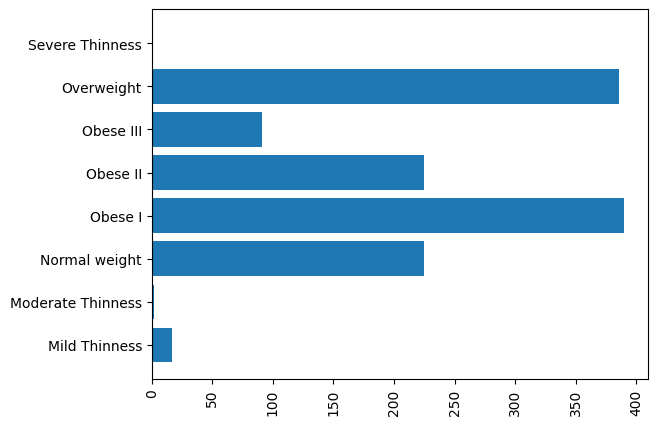

In [934]:
# Count of people as per BMI status -

bmi_status_data = df.groupby('bmi_status').size().reset_index(name='bmi_status_count')
print(bmi_status_data)
print()
plt.barh(bmi_status_data['bmi_status'], bmi_status_data['bmi_status_count'])
plt.xticks(rotation=90)
plt.show()

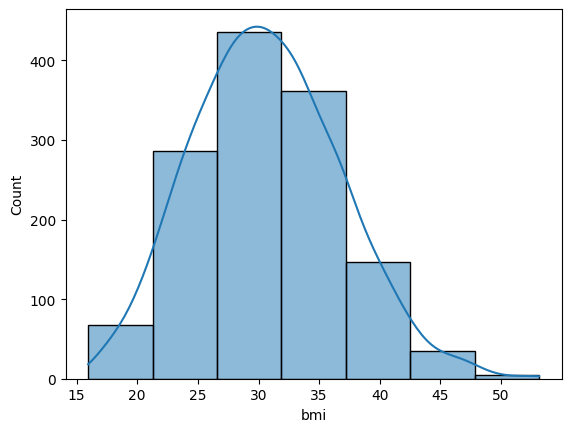

In [935]:
# Distribution of BMI range-
sns.histplot(df['bmi'], bins=7, kde=True)
plt.show()

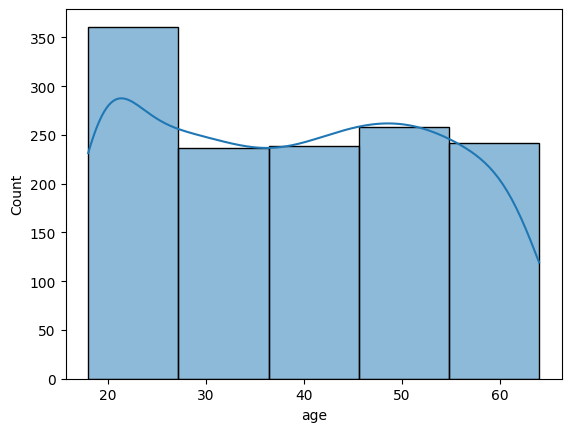

In [936]:
# Distribution of Age
sns.histplot(df['age'], bins=5, kde=True)
plt.show()

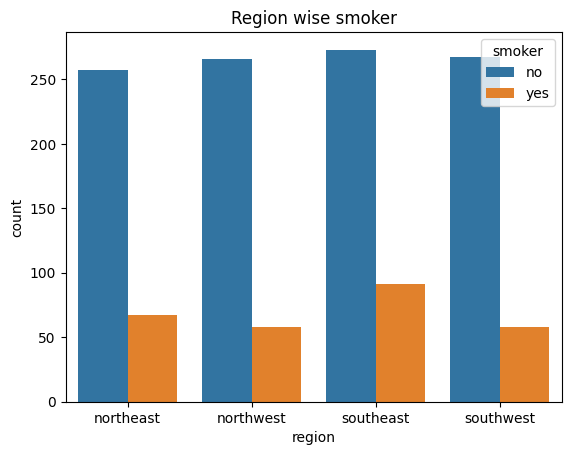

In [937]:
# Region wise smoker
region_smoker = df.groupby(['region','smoker']).size().reset_index(name='count')
sns.barplot(x='region',y='count',data = region_smoker, hue='smoker')
plt.title('Region wise smoker')
plt.show()

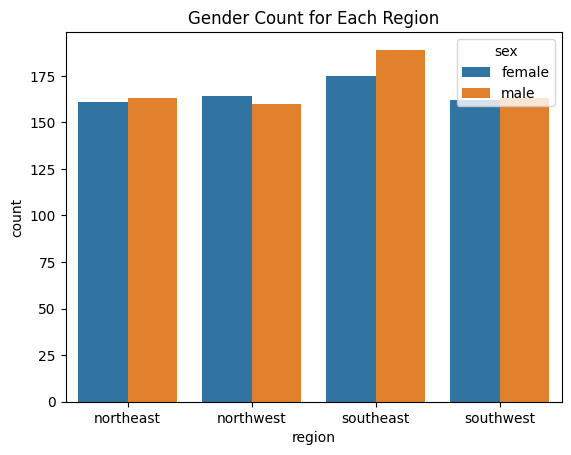

In [938]:
# Region wise people count classifing gender
region_sex = df.groupby(['region','sex']).size().reset_index(name='count')
sns.barplot(x='region',y='count',data = region_sex, hue='sex')
plt.title('Gender Count for Each Region')
plt.show()

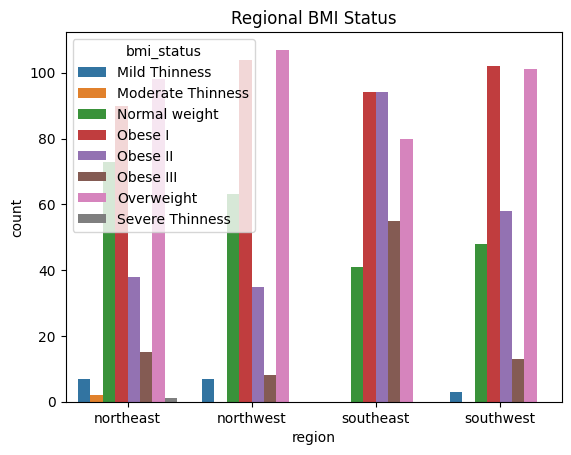

In [939]:
# Regional BMI Status
region_bmi = df.groupby(['region','bmi_status']).size().reset_index(name='count')
sns.barplot(x='region',y='count',data = region_bmi, hue='bmi_status')
plt.title('Regional BMI Status')
plt.show()

In [940]:
smoker = normal_bmi.groupby(['smoker']).size().reset_index(name='count')
smoker

,smoker,count
0,no,175
1,yes,50


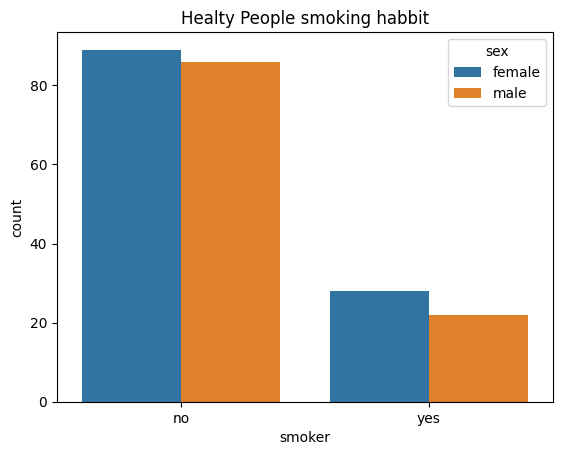

In [941]:
#Normal BMI People
normal_bmi_smoker = normal_bmi.groupby(['smoker','sex']).size().reset_index(name='count')
sns.barplot(x='smoker',y='count',data=normal_bmi_smoker, hue='sex')
plt.title('Healty People smoking habbit')
plt.show()


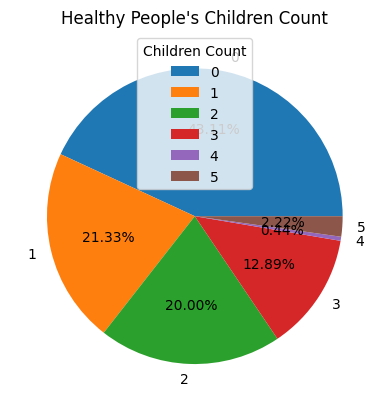

In [942]:
#People with Normal BMI having childrens
normal_bmi_child = normal_bmi.groupby(['children']).size().reset_index(name='count')
plt.pie(normal_bmi_child['count'], labels = normal_bmi_child['children'], autopct='%1.2f%%')
plt.legend(title='Children Count')
plt.title("Healthy People's Children Count")
plt.show()

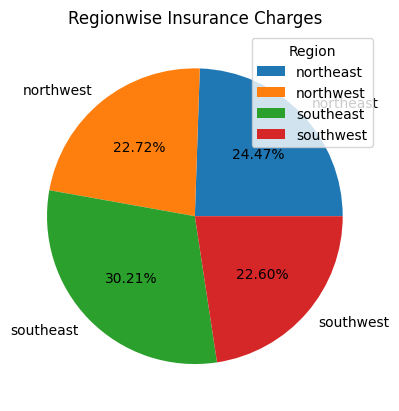

In [943]:
# Charges by region
region_charges = df.groupby(['region'])['charges'].sum().reset_index()
plt.pie(region_charges['charges'], labels = region_charges['region'], autopct='%1.2f%%')
plt.legend(title='Region')
plt.title('Regionwise Insurance Charges')
plt.show()

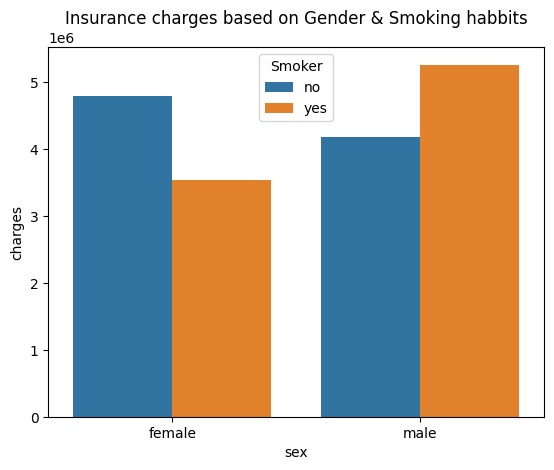

In [944]:
# Smoker Sex Charges
smoke_charges = df.groupby(['smoker','sex'])['charges'].sum().reset_index()
sns.barplot(x='sex',y='charges',data=smoke_charges,hue='smoker')
plt.title('Insurance charges based on Gender & Smoking habbits')
plt.legend(title='Smoker')
plt.show()

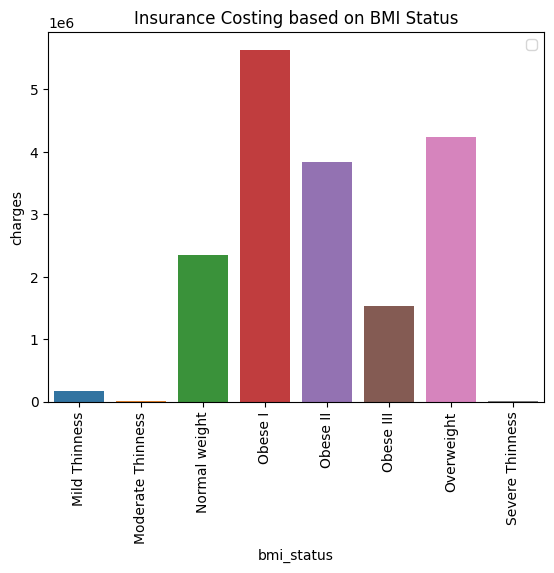

In [945]:
bmi_charges = df.groupby(['bmi_status'])['charges'].sum().reset_index()

sns.barplot(x='bmi_status',y='charges',data=bmi_charges)
plt.xticks(rotation=90)
plt.legend()
plt.title('Insurance Costing based on BMI Status')
plt.show()

In [946]:
df.groupby(['bmi_status'])['charges'].sum().reset_index()

,bmi_status,charges
0,Mild Thinness,1.655412e+05
1,Moderate Thinness,9.808001e+03
2,Normal weight,2.342101e+06
3,Obese I,5.636453e+06
4,Obese II,3.830008e+06
5,Obese III,1.527400e+06
6,Overweight,4.241179e+06
7,Severe Thinness,1.694796e+03


### Model Prediction

In [947]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [948]:
onehot_encoder = OneHotEncoder(sparse_output=False)
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[['region']]), columns=onehot_encoder.get_feature_names_out(["region"]))

df = pd.concat([df, df_encoded], axis=1)

In [949]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 581
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   sex               1337 non-null   float64
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   float64
 4   smoker            1337 non-null   float64
 5   region            1337 non-null   object 
 6   charges           1337 non-null   float64
 7   bmi_status        1337 non-null   object 
 8   region_northeast  1337 non-null   float64
 9   region_northwest  1337 non-null   float64
 10  region_southeast  1337 non-null   float64
 11  region_southwest  1337 non-null   float64
dtypes: float64(10), object(2)
memory usage: 135.9+ KB


In [950]:
df.dropna(inplace=True)

In [951]:
# scaler = StandardScaler()
# df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

In [952]:
# Feature engineering 

df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_smoker'] = df['age'] * df['smoker']

<Axes: >

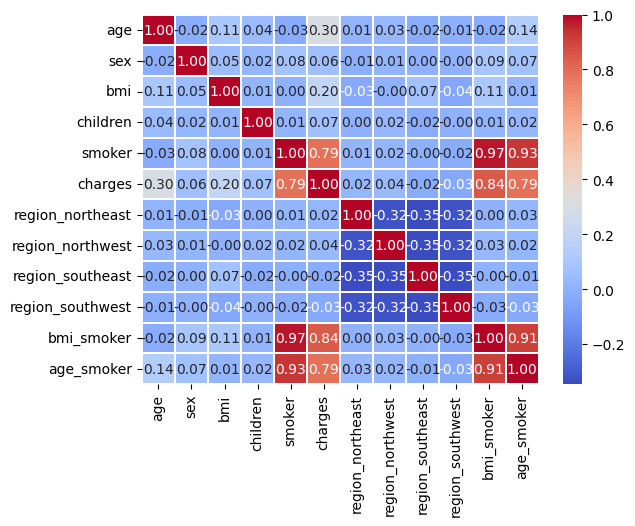

In [953]:
df_corr = df.drop(['bmi_status','region'], axis=1).corr()
sns.heatmap(df_corr, annot=True,cmap="coolwarm", fmt=".2f", linewidths=.2)

In [954]:
y = df['charges']
x = df.drop(['charges','bmi_status','region'],axis=1)

In [955]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

##### Linear Regression

In [956]:
model = LinearRegression()

model.fit(x_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: -2225.1548748308433
Coefficient: 264.69083134792265


In [957]:
y_pred = model.predict(x_test)

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results

,Actual,Predicted
17,2395.17155,3787.609869
1090,41676.08110,41876.096504
273,9617.66245,11443.081665
270,1719.43630,2464.089108
874,8891.13950,10445.940593
...,...,...
407,8539.67100,10608.724511
468,23288.92840,5943.993145
1099,3227.12110,5108.642393
682,40103.89000,39125.227210


In [958]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 23527983.793186877
R-squared (R2 Score): 0.8425991227862164


##### XGBoost Regression

In [959]:
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results

,Actual,Predicted
17,2395.17155,6227.525391
1090,41676.08110,49109.664062
273,9617.66245,15514.949219
270,1719.43630,4211.477539
874,8891.13950,8534.145508
...,...,...
407,8539.67100,11488.769531
468,23288.92840,3266.261719
1099,3227.12110,7191.380371
682,40103.89000,41565.941406


In [960]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

Mean Squared Error (MSE): 28950751.600874323
R-squared (R2 Score): 0.8063211136988488


### **Conclusion**

1. A very small portion of the population falls under the "thin" BMI category, while 225 individuals have a healthy BMI, and the majority fall into overweight or obese categories, increasing their risk for diseases like diabetes and hypertension.  
2. The age distribution is fairly balanced, but a significant proportion of the population is concentrated in the 20-30 age group.  
3. The Southeast region has the highest number of smokers, which directly contributes to higher insurance charges in this area.  
4. The population of the Southeast region is slightly higher compared to other regions, further influencing regional insurance cost trends.  
5. While some individuals with a normal BMI are smokers, their count is much lower compared to non-smokers.  
6. Individuals in the "Obese I" category contribute significantly more to insurance claims compared to other BMI categories.  
7. A machine learning model was developed to predict insurance charges, achieving an accuracy of approximately 85%, indicating strong predictive capability.  

### **Future Scope**

1. Incorporating additional features like physical activity levels, diet, and medical history could enhance model accuracy and provide deeper insights into healthcare expenses.  
2. Developing region-specific models or interventions can help insurance providers design tailored policies to mitigate high-risk factors like smoking and obesity.  

### Credits

This notebook was created by [Pranal Patil](https://www.kaggle.com/Pranal17).  
Feel free to connect with me on Kaggle and explore more of my work!